In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

In [2]:
# 读取excel数据，第一行为列名
file = "data/data.xlsx"
data = pd.read_excel(file, header=0)

# 截取数据的第7列至最后一列
data = data.iloc[:, 6:]

# 打印数据的前几行
print(data.head()) 

   重量平均值    重量相对偏差  重量标准偏差  重量变异系数  重量最小值  重量最大值  吸阻平均值    吸阻相对偏差  吸阻标准偏差  \
0  0.516  0.006524   0.011   2.202  0.499  0.538  1.275  0.041404   0.048   
1  0.515  0.004573   0.012   2.350  0.482  0.545  1.321  0.006820   0.046   
2  0.507  0.011032   0.012   2.316  0.477  0.524  1.291  0.029375   0.049   
3  0.507  0.011032   0.013   2.549  0.479  0.529  1.296  0.025616   0.059   
4  0.509  0.007131   0.009   1.863  0.486  0.531  1.350  0.014984   0.058   

   吸阻变异系数  ...  嘴通最小值  嘴通最大值  总通平均值  总通标准偏差  总通变异系数  总通最小值  总通最大值     水分  \
0   3.784  ...   33.7   41.4   44.6   2.006   4.502   40.1   48.0  12.08   
1   3.465  ...   31.3   39.6   43.0   2.106   4.904   37.8   47.0  12.12   
2   3.802  ...   30.9   37.4   42.0   1.810   4.308   38.4   45.3  11.86   
3   4.587  ...   31.4   41.4   42.8   2.027   4.739   36.8   47.5  11.64   
4   4.322  ...   33.1   39.9   42.0   1.577   3.751   38.4   45.6  11.63   

    含末率  端部落丝量  
0  3.26    0.7  
1  3.09    0.7  
2  4.32    1.2  
3  3.69    1

In [3]:
# 检查并处理缺失值（NaNs）和异常值（outliers）
def preprocess_data(df):
    # 检查缺失值
    if df.isnull().values.any():
        # 如果存在的缺失值是-3至-1列，则删除这行数据；如果存在的缺失值是其他列，则用均值填充
        for col in df.columns[-3:]:
            df = df[df[col].notna()]
        df = df.fillna(df.mean())
    else:
        print("数据中没有缺失值。")

    # 检查异常值
    for column in df.select_dtypes(include=[np.number]).columns:
        if (df[column] < 0).any():
            print(f"列 {column} 存在异常值（负数），正在处理...")
            df[column] = df[column].clip(lower=0)

    print("异常值已处理。")
    return df

print("数据预处理前的形状:", data.shape)
data = preprocess_data(data)
print("数据预处理后的形状:", data.shape)

数据预处理前的形状: (1237, 43)
异常值已处理。
数据预处理后的形状: (321, 43)


In [4]:
# 进行Z-score标准化
from sklearn.preprocessing import StandardScaler
print("原始数据的统计信息:")
print(data.describe())

# 2. 创建并使用 StandardScaler
# 创建StandardScaler的实例
scaler = StandardScaler()

# 使用 .fit_transform() 一步完成拟合和转换
# 注意：StandardScaler的输出是一个NumPy数组，而不是Pandas DataFrame
scaled_data_numpy = scaler.fit_transform(data)
# 为了方便查看，可以将其转换回DataFrame
scaled_data = pd.DataFrame(scaled_data_numpy, columns=data.columns)

print("\n-------------------------------------------------")
print("\n标准化后数据的统计信息:")
print(scaled_data.describe())

原始数据的统计信息:
            重量平均值      重量相对偏差      重量标准偏差      重量变异系数       重量最小值       重量最大值  \
count  321.000000  321.000000  321.000000  321.000000  321.000000  321.000000   
mean     0.512968    0.007715    0.010581    2.055283    0.490963    0.534660   
std      0.004992    0.005956    0.001506    0.286316    0.007370    0.007447   
min      0.502000    0.000672    0.005000    1.006000    0.466000    0.517000   
25%      0.509000    0.003229    0.010000    1.880000    0.487000    0.529000   
50%      0.513000    0.006524    0.011000    2.057000    0.491000    0.533000   
75%      0.516000    0.010425    0.011000    2.228000    0.495000    0.538000   
max      0.531000    0.035783    0.016000    3.133000    0.518000    0.564000   

            吸阻平均值      吸阻相对偏差      吸阻标准偏差      吸阻变异系数  ...       嘴通最小值  \
count  321.000000  321.000000  321.000000  321.000000  ...  321.000000   
mean     1.334728    0.018218    0.049955    3.740691  ...   34.193065   
std      0.030251    0.014023    0.00

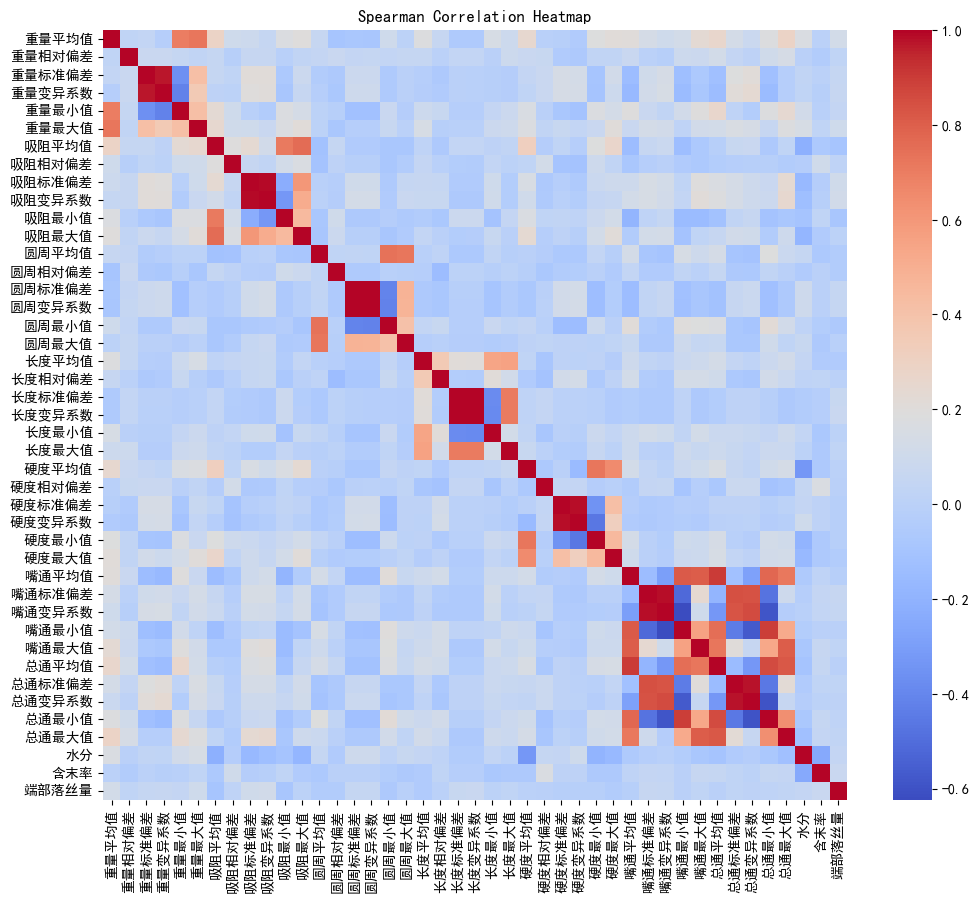

In [5]:
# 1. 计算Spearman相关系数矩阵
correlation_matrix = data.corr(method='spearman')

# 2. 使用热力图进行可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # For Windows
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 10))
seaborn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

In [8]:
# 进行PCA降维
from sklearn.decomposition import PCA
# 1. 创建PCA对象，设置主成分数为6
pca = PCA(n_components=18)
# 2. 拟合数据并转换
pca_data = pca.fit_transform(scaled_data)
# 3. 将PCA结果转换为DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("\n-------------------------------------------------")
print("PCA降维后的数据:")
print(pca_df.head())


-------------------------------------------------
PCA降维后的数据:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.888632  0.669050 -2.252114 -2.139062  1.631798  2.401427 -1.902731   
1 -4.682582  0.621209 -1.031520 -0.711572  1.172472  1.462598 -0.003218   
2 -4.372133 -1.281387 -1.344159  0.162575 -2.067513 -0.951007  0.795925   
3 -4.002806  1.346470 -2.539140  0.700759 -0.610533 -1.620400 -0.406953   
4 -2.413572 -1.028382 -0.156108  1.544385 -0.531982 -0.991260  1.323092   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.954661  1.155984 -0.963590 -0.004753 -0.998801  1.256786 -1.117667   
1  0.943849 -0.117544 -0.092930  0.405323  0.512674 -0.863050  0.788865   
2  0.788347 -0.233867  2.908727  4.307341 -2.219321  1.554902 -2.470034   
3  0.869360 -0.621779  3.112510  2.707502 -2.116562  1.610237 -2.645837   
4 -1.695676  0.659193  0.385458 -1.863484 -0.433862  1.667404  0.418154   

       PC15      PC16      PC17     


每个主成分的方差解释率:
[0.12649648 0.10407028 0.07477376 0.07100856 0.06647454 0.05758462
 0.05477568 0.05146325 0.04798037 0.04267489 0.03598862 0.03299488
 0.02997835 0.02354179 0.02227188 0.02036586 0.01994467 0.01914902]

前两个主成分解释的总方差: 50.04%
前五个主成分解释的总方差: 90.15%


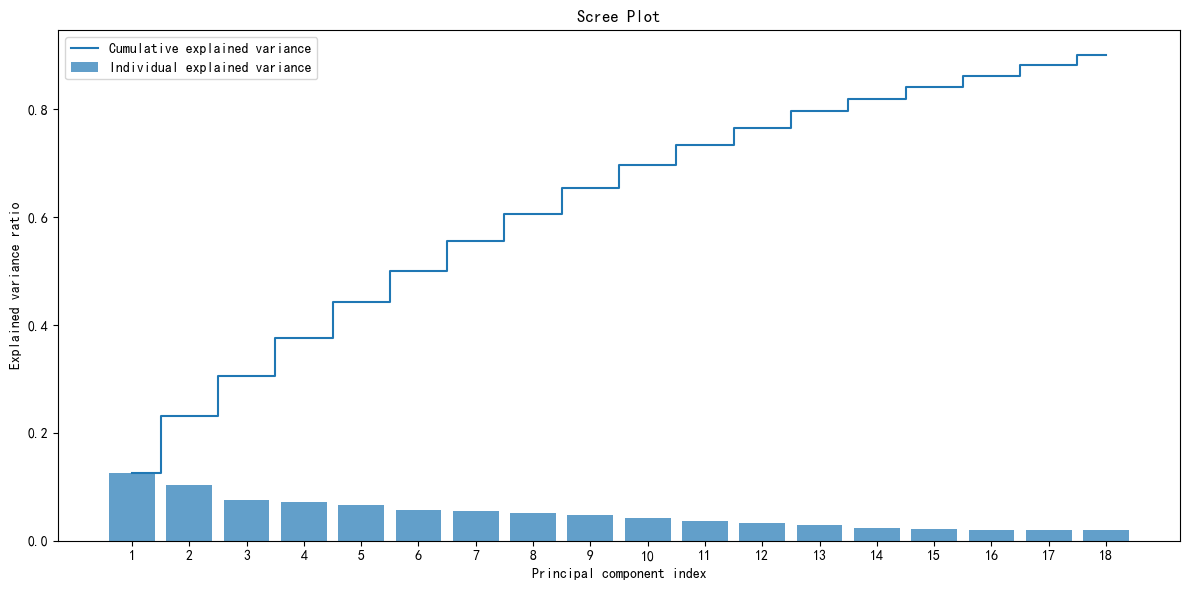

In [9]:
# 获取每个主成分的方差解释率
explained_variance = pca.explained_variance_ratio_

print("\n每个主成分的方差解释率:")
print(explained_variance)

print(f"\n前两个主成分解释的总方差: {sum(explained_variance[:6]):.2%}")
print(f"前五个主成分解释的总方差: {sum(explained_variance[:18]):.2%}")

# 可视化方差解释率 (Scree Plot)
plt.figure(figsize=(12, 6))
plt.bar(range(1, 1 + pca.n_components_), explained_variance, alpha=0.7, align='center', label='Individual explained variance')
plt.step(range(1, 1 + pca.n_components_), np.cumsum(explained_variance), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot')
plt.xticks(range(1, 1 + pca.n_components_))
plt.legend(loc='best')
plt.tight_layout()
plt.show()

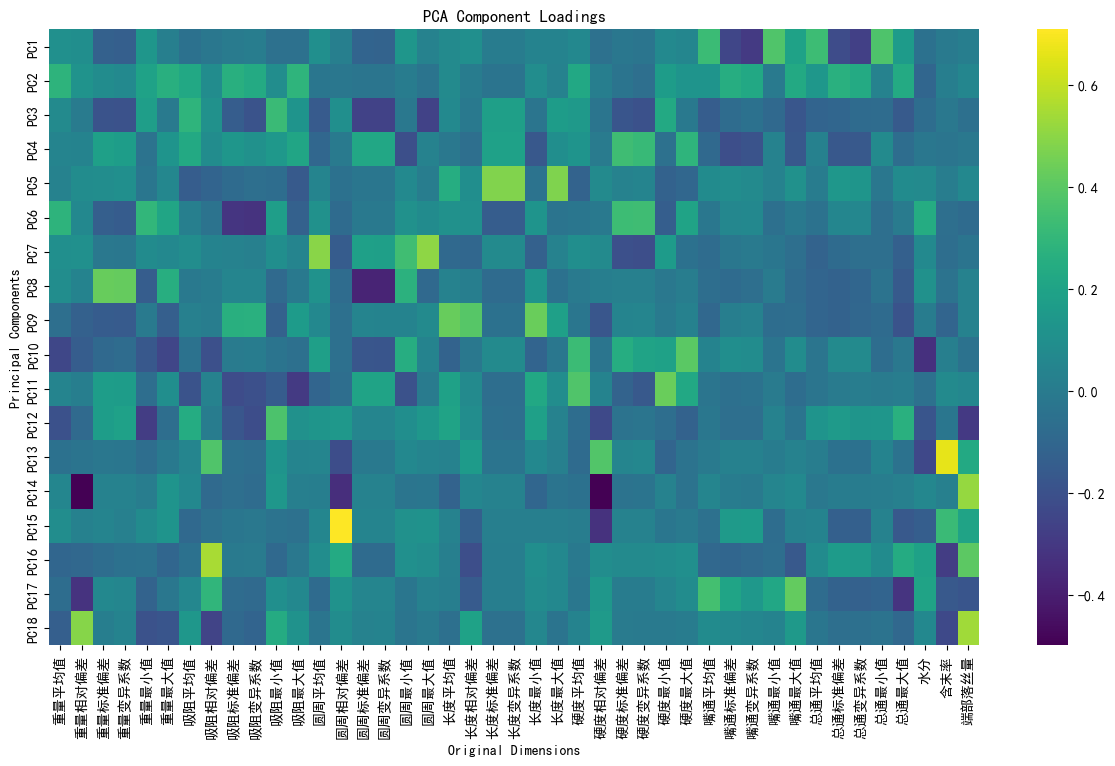

In [11]:
# 查看主成分载荷 (pca.components_的形状是 [n_components, n_features])
# 我们用热力图来可视化前几个主成分的载荷
plt.figure(figsize=(15, 8))
seaborn.heatmap(pca.components_, cmap='viridis', annot=False, 
            xticklabels=data.columns, yticklabels=[f'PC{i+1}' for i in range(18)])
plt.title('PCA Component Loadings')
plt.xlabel('Original Dimensions')
plt.ylabel('Principal Components')
plt.show()


保留95%方差后，数据维度从40降到了 22 维。


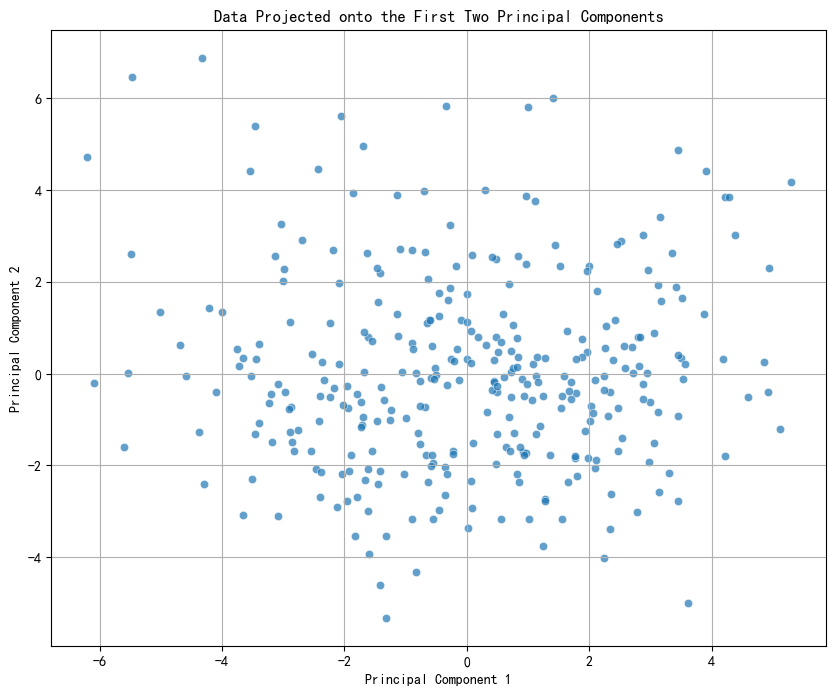

In [12]:
# 1. 决定要保留的主成分数量
# 我们可以根据方差解释率来决定，例如保留95%的方差
# scikit-learn允许直接传入一个浮点数
pca_reduced = PCA(n_components=0.95) 
scaled_data_reduced = pca_reduced.fit_transform(scaled_data)
print(f"\n保留95%方差后，数据维度从40降到了 {pca_reduced.n_components_} 维。")

# 2. 将数据投影到前两个主成分上进行可视化
# 创建一个新的DataFrame用于绘图
pca_df_2d = pd.DataFrame(data = pca_data[:, :2], columns = ['PC1', 'PC2'])

plt.figure(figsize=(10, 8))
seaborn.scatterplot(x='PC1', y='PC2', data=pca_df_2d, alpha=0.7)
plt.title('Data Projected onto the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()